# Pandas
### Pivot Tables

A pivot table is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data. The pivot table takes simple column- wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data. The difference between pivot tables and GroupBy can sometimes cause confusion; it helps me to think of pivot tables as essentially a multidimensional version of GroupBy aggregation. That is, you split- apply-combine, but both the split and the combine happen across not a one- dimensional index, but across a two-dimensional grid.

In [52]:
import numpy as np 
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [53]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Pivoting tables by hand using groupby

#### Column indexing:
The GroupBy object supports column indexing in the same way as the DataFrame, and returns a modified GroupBy object. For example:

In [54]:
titanic.groupby('sex')[['survived']]

Here we’ve selected a particular Series group from the original DataFrame group by reference to its column name. As with the GroupBy object, no computation is done until we call some aggregate on the object:

In [57]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


Lets dig a bit deeper lets look at survival by both sex and, say, class. we group by class and gender, select survival, apply a mean aggregate, com‐ bine the resulting groups, and then unstack the hierarchical index to reveal the hidden multidimensionality. In code:

In [64]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


```unstack()``` Returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.

### Pivot Table Syntax

In [68]:
titanic.pivot_table('survived', index='sex', columns='class',aggfunc='mean') # who

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


we can further use a parameter ```aggfunc``` and pass it the aggregate functions that we are familiar with such as 
```mean```, ```std```, ```count```

## DataFrame.query() Method

In [70]:
rng = np.random.RandomState(42)
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])

In [71]:
df.head()

,A,B,C
0,0.374540,0.950714,0.731994
1,0.598658,0.156019,0.155995
2,0.058084,0.866176,0.601115
3,0.708073,0.020584,0.969910
4,0.832443,0.212339,0.181825


In [72]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = df.query('A < 0.5 and B < 0.5')
result2

,A,B,C
5,0.183405,0.304242,0.524756
6,0.431945,0.291229,0.611853
7,0.139494,0.292145,0.366362
12,0.304614,0.097672,0.684233
13,0.440152,0.122038,0.495177
...,...,...,...
970,0.230417,0.001474,0.729345
973,0.302931,0.325295,0.712621
987,0.345342,0.335610,0.978525
990,0.380518,0.163035,0.786206


In [25]:
np.allclose(result1, result2)

True

```numpy.allclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)``` 
Returns True if two arrays are element-wise equal within a tolerance.

# Visualization with Matplotlib

We'll now take an in-depth look at the Matplotlib package for visualization in Python.
Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack.
It was conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive MATLAB-style plotting via gnuplot from the IPython command line.
IPython's creator, Fernando Perez, was at the time scrambling to finish his PhD, and let John know he wouldn’t have time to review the patch for several months.
John took this as a cue to set out on his own, and the Matplotlib package was born, with version 0.1 released in 2003.
It received an early boost when it was adopted as the plotting package of choice of the Space Telescope Science Institute (the folks behind the Hubble Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends.
Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish.
This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib.
It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

In recent years, however, the interface and style of Matplotlib have begun to show their age.
Newer tools like ggplot and ggvis in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned.
Still, I'm of the opinion that we cannot ignore Matplotlib's strength as a well-tested, cross-platform graphics engine.
Recent Matplotlib versions make it relatively easy to set new global plotting styles, and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn, [HoloViews](http://holoviews.org/), [Altair](http://altair-viz.github.io/), and even Pandas itself can be used as wrappers around Matplotlib's API.
Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output.
For this reason, I believe that Matplotlib itself will remain a vital piece of the data visualization stack, even if new tools mean the community gradually moves away from using the Matplotlib API directly.

## General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [73]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The ``plt`` interface is what we will use most often, as we shall see throughout our labs.

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

In [74]:
plt.style.use('classic')

Throughout this section, we will adjust this style as needed.
Note that the stylesheets used here are supported as of Matplotlib version 1.5; if you are using an earlier version of Matplotlib, only the default style is available.

### ``show()`` or No ``show()``? How to Display Your Plots

A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.
The best use of Matplotlib differs depending on how you are using it; roughly, the three applicable contexts are using Matplotlib in a script, in an IPython terminal, or in an IPython notebook.

#### Plotting from a script

If you are using Matplotlib from within a script, the function ``plt.show()`` is your friend.
``plt.show()`` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

So, for example, you may have a file called *myplot.py* containing the following:

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed:

```
$ python myplot.py
```

The ``plt.show()`` command does a lot under the hood, as it must interact with your system's interactive graphical backend.
The details of this operation can vary greatly from system to system and even installation to installation, but matplotlib does its best to hide all these details from you.

One thing to be aware of: the ``plt.show()`` command should be used *only once* per Python session, and is most often seen at the very end of the script.
Multiple ``show()`` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

#### Plotting from an IPython notebook

The IPython notebook is a browser-based interactive data analysis tool that can combine narrative, code, graphics, HTML elements, and much more into a single executable document.

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command, and works in a similar way to the IPython shell.
In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

For our labs, we will generally opt for ``%matplotlib inline``:

In [76]:
%matplotlib inline

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

In [85]:
import numpy as np
x = np.linspace(0, 10, 100)

In [86]:
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [87]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

##### Calculating the sin of evenly spaced values

In [88]:
np.sin(x)

array([ 0.        ,  0.10083842,  0.20064886,  0.2984138 ,  0.39313661,
        0.48385164,  0.56963411,  0.64960951,  0.72296256,  0.78894546,
        0.84688556,  0.8961922 ,  0.93636273,  0.96698762,  0.98775469,
        0.99845223,  0.99897117,  0.98930624,  0.96955595,  0.93992165,
        0.90070545,  0.85230712,  0.79522006,  0.73002623,  0.65739025,
        0.57805259,  0.49282204,  0.40256749,  0.30820902,  0.21070855,
        0.11106004,  0.01027934, -0.09060615, -0.19056796, -0.28858706,
       -0.38366419, -0.47483011, -0.56115544, -0.64176014, -0.7158225 ,
       -0.7825875 , -0.84137452, -0.89158426, -0.93270486, -0.96431712,
       -0.98609877, -0.99782778, -0.99938456, -0.99075324, -0.97202182,
       -0.94338126, -0.90512352, -0.85763861, -0.80141062, -0.73701276,
       -0.66510151, -0.58640998, -0.50174037, -0.41195583, -0.31797166,
       -0.22074597, -0.12126992, -0.0205576 ,  0.0803643 ,  0.18046693,
        0.27872982,  0.37415123,  0.46575841,  0.55261747,  0.63

##### To be familiar with how sine and coine works you should be familiar with their mathematical background

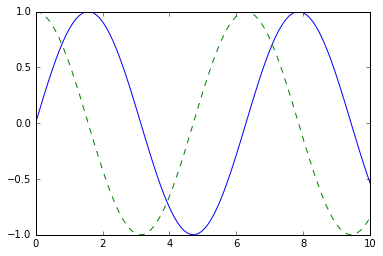

In [92]:
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');
plt.savefig('my_figure.png')
plt.show()

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
Make sure that you save the figure first then only show it.

We now have a file called ``my_figure.png`` in the current working directory:

In [93]:
!ls -lh my_figure.png

-rw-r--r--@ 1 saadnaeem  staff    26K Apr 21 11:17 my_figure.png


In [49]:
!man ls


LS(1)                     BSD General Commands Manual                    LS(1)

NNAAMMEE
     llss -- list directory contents

SSYYNNOOPPSSIISS
     llss [--AABBCCFFGGHHLLOOPPRRSSTTUUWW@@aabbccddeeffgghhiikkllmmnnooppqqrrssttuuwwxx11%%] [_f_i_l_e _._._.]

DDEESSCCRRIIPPTTIIOONN
     For each operand that names a _f_i_l_e of a type other than directory, llss
     displays its name as well as any requested, associated information.  For
     each operand that names a _f_i_l_e of type directory, llss displays the names
     of files contained within that directory, as well as any requested, asso-
     ciated information.

     If no operands are given, the contents of the current directory are dis-
     played.  If more than one operand is given, non-directory operands are
     displayed first; directory and non-directory operands are sorted sepa-
     rately and in lexicographical order.

     The follo

To confirm that it contains what we think it contains, let's use the IPython ``Image`` object to display the contents of this file:

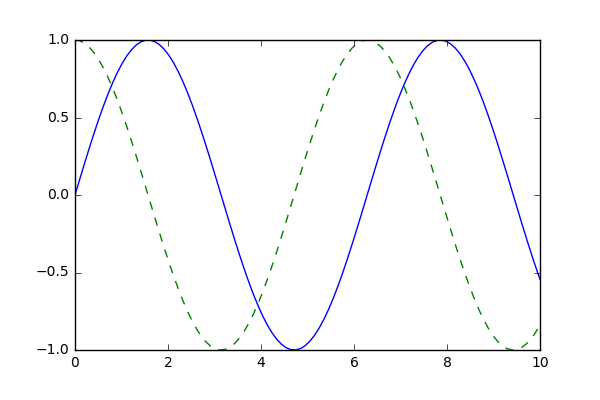

In [94]:
from IPython.display import Image
Image('my_figure.png')

In ``savefig()``, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [51]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Note that when saving your figure, it's not necessary to use ``plt.show()`` or related commands discussed earlier.

## Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

#### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the pyplot (``plt``) interface.
For example, the following code will probably look quite familiar to MATLAB users:

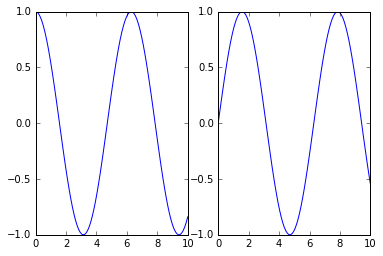

In [102]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(1, 2, 2) # (rows, columns, panel number) 
#How many rows How many cols (try 2) i.e The grid will have 2 rows and 1 col Top Plot index/Panel Number = 1
plt.plot(x, np.sin(x))
# Swap the panels
# create the second panel and set current axis Bottom Plot index/Panel Number = 2
plt.subplot(1, 2, 1)
plt.plot(x, np.cos(x));


It is important to note that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied.
You can get a reference to these using the ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.
To re-create the previous plot using this style of plotting, you might do the following:

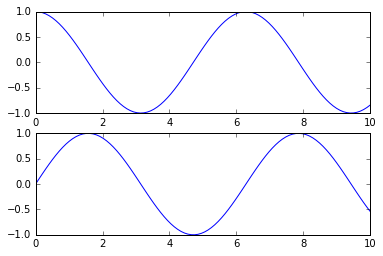

In [100]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2) # returning blank canvas/frame and axis object

# Call plot() method on the appropriate object
ax[1].plot(x, np.sin(x))
ax[0].plot(x, np.cos(x));

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.
Throughout our labs, we will switch between the MATLAB-style and object-oriented interfaces, depending on what is most convenient.
In most cases, the difference is as small as switching ``plt.plot()`` to ``ax.plot()``, but there are a few gotchas that I will highlight as they come up in the following sections.